問題1.1を検討する。  
式(1.2)は式(1.1)より、
$$
E({\bf w}) = \frac{1}{2}\sum_{n=1}^{N} {\{y(x_n, {\bf w}) - t_n\} }^2 = \frac{1}{2}\sum_{n=1}^{N} {\{\sum_{j = 0}^{M} {w_j {x_n}^j} - t_n\} }^2
$$
これをもとに$E({\bf w})$を最小にする、$w_i$を検討する。偏微分が0になることを考えると、
$$
\frac{\partial{E({\bf w})}}{\partial w_i} = \sum_{n=1}^{N} (\sum_{j = 0}^{M}w_j {x_n}^j - t_n) {x_n}^i = 0
$$
になる。
よって、
$$
\sum_{n=1}^{N} (\sum_{j = 0}^{M}w_j {x_n}^{i + j}) = \sum_{j = 0}^{M} (A_{ij} w_j) = \sum_{n=1}^{N} {x_n}^i t_n = T_i
$$
つまり、
$$
\sum_{j = 0}^{M} (A_{ij} w_j) = T_i
$$
$A = \{A_{ij}\}, w = {w_i}, T = {T_i}$とすると、$Aw = T$となる。

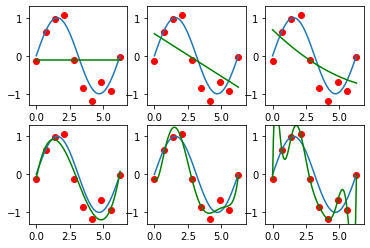

[[-0.12306934]]
[[ 0.57853893 -0.22332885]]
[[ 0.68631524 -0.33911249  0.01842754]]
[[-0.11173365  1.75207282 -0.85875101  0.09307154]]
[[-0.22977209  2.45656287 -1.42497254  0.23761556 -0.01150245]]
[[-0.16720399  1.54938703 -0.22146302 -0.30381686  0.08726977 -0.00628803]]
[[-0.10936357 -0.9071245   4.60198877 -3.60796719  1.10350445 -0.1501575
   0.00763251]]
[[-1.30078716e-01  2.65826814e+00 -4.76137827e+00  5.22924412e+00
  -2.87342016e+00  7.72864011e-01 -9.89762529e-02  4.84780341e-03]]
[[-1.30933019e-01  3.65191056e+00 -7.95059954e+00  9.05771152e+00
  -5.17204404e+00  1.53450210e+00 -2.40397779e-01  1.86281702e-02
  -5.48303321e-04]]
[[-1.33144870e-01  2.09168403e+01 -7.14153593e+01  1.00038675e+02
  -7.31977315e+01  3.10303510e+01 -7.92723434e+00  1.20525165e+00
  -1.00467646e-01  3.53393187e-03]]


In [5]:
#図1.3を書いてみる。
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def solW(xData, yData, M):
    A = np.zeros((M+1, M+1))
    T = np.zeros((M+1, 1))
    for i in range(M + 1):
        for (x, y) in zip(xData, yData):
            for j in range(M + 1):
                A[i][j] += x ** (i+j)
            T[i] += y * x**i

    W = np.linalg.inv(A).dot(T)
    
    return W.T
    
def getY(x, ws):
    y = 0
    xTmp = np.ones(len(x))
    
    for w in ws[0]:
        y += w * xTmp
        xTmp *= x
    
    return y
    
numSin = 100
xSin = 2 * math.pi / (numSin - 1) * np.array(range(numSin))
ySin = np.sin(xSin)

numData = 10
xData = 2 * math.pi / (numData - 1) * np.array(range(numData))
yData = np.sin(xData) + np.random.normal(loc = 0, scale = 0.3, size = numData)

W = []
yW = []
for m in range(numData):
    W.append(solW(xData, yData, m))
    yW.append(getY(xSin, W[m]))

graphNum = 0
for m in [0, 1, 2, 3, 6, 9]:
    graphNum += 1
    pos = 230 + graphNum
    plt.subplot(pos)
    plt.ylim(-1.3, 1.3)
    plt.plot(xSin, ySin)
    plt.plot(xSin, yW[m], color = "green")
    plt.scatter(xData, yData, color = "red")

plt.show()

for w in W:
    print(w)

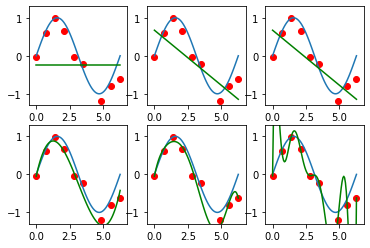

[-0.23578784]
[-0.28922121  0.6728274 ]
[ 1.37222954e-05 -2.89307431e-01  6.72907653e-01]
[ 0.08429048 -0.79440537  1.60458012 -0.04984745]
[-0.00726694  0.17560953 -1.15212897  2.04965807 -0.12442097]
[-0.01017865  0.15261888 -0.70082485  0.79603127  0.58118284 -0.02313994]
[-0.00373351  0.06019635 -0.34448116  0.91542904 -1.56340215  1.78280683
 -0.05143309]
[-1.30475241e-03  2.49594944e-02 -1.88228436e-01  7.25880311e-01
 -1.46304464e+00  9.56682668e-01  8.23206299e-01 -4.58576950e-02]
[ 4.86020181e-03 -1.23454947e-01  1.27853026e+00 -6.93944338e+00
  2.11010449e+01 -3.53988458e+01  2.92261794e+01 -7.98462262e+00
 -3.81248793e-02]
[ 7.56252094e-03 -2.08965040e-01  2.41590024e+00 -1.51712232e+01
  5.61815777e+01 -1.24474212e+02  1.59301510e+02 -1.06589128e+02
  2.89598407e+01 -4.03484500e-02]


In [5]:
#上記のコードをライブラリで実行する。
#図1.3は多項式回帰なので、numpyのpolyfitを利用する。
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

numSin = 100
xSin = 2 * math.pi / (numSin - 1) * np.array(range(numSin))
ySin = np.sin(xSin)

numData = 10
xData = 2 * math.pi / (numData - 1) * np.array(range(numData))
yData = np.sin(xData) + np.random.normal(loc = 0, scale = 0.3, size = numData)

W = []
yW = []
for m in range(numData):
    #W.append(solW(xData, yData, m))
    #上記が以下になる。
    W.append(np.polyfit(xData, yData, m))
    #yW.append(getY(xSin, W[m]))
    #上記が以下になる。
    p = np.poly1d(W[m])
    yW.append(p(xSin))

graphNum = 0
for m in [0, 1, 2, 3, 6, 9]:
    graphNum += 1
    pos = 230 + graphNum
    plt.subplot(pos)
    plt.ylim(-1.3, 1.3)
    plt.plot(xSin, ySin)
    plt.plot(xSin, yW[m], color = "green")
    plt.scatter(xData, yData, color = "red")

plt.show()

for w in W:
    print(w)

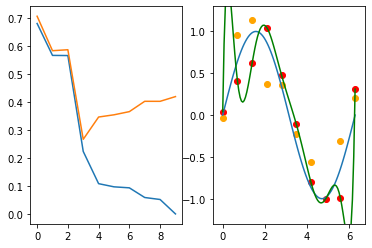

In [2]:
#図1.5を書いてみる。
#このセルを動作させるには2つ前のセルを動かす必要がある。
yTest = np.sin(xData) + np.random.normal(loc = 0, scale = 0.3, size = numData)

Etrain = []
Erms_train = []
Etest = []
Erms_test = []
for m in range(numData):
    Etrain.append(0.5 * sum((yData - getY(xData, W[m]))**2))
    Erms_train.append(np.sqrt(2 * Etrain[m] / numData))

    Etest.append(0.5 * sum((yTest - getY(xData, W[m]))**2))
    Erms_test.append(np.sqrt(2 * Etest[m] / numData))

x = list(list(range(numData)))

plt.subplot(121)
plt.plot(x, Erms_train)
plt.plot(x, Erms_test)

plt.subplot(122)
plt.ylim(-1.3, 1.3)
plt.plot(xSin, ySin)
plt.plot(xSin, yW[9], color = "green")
plt.scatter(xData, yData, color = "red")
plt.scatter(xData, yTest, color = "orange")

plt.show()

問題1.2を検討する。問題1.2と同様に  
式(1.4)は、
$$
\tilde{E}({\bf w}) = \frac{1}{2}\sum_{n=1}^{N} {\{\sum_{j = 0}^{M} {w_j {x_n}^j} - t_n\} }^2 + \frac{\lambda}{2}\sum_{j = 1}^{M} {w_j}^2
$$
これをもとに$\tilde{E}({\bf w})$を最小にする、$w_i$を検討する。偏微分が0になることを考えると、
$$
\frac{\partial{\tilde{E}({\bf w})}}{\partial w_i} = \sum_{n=1}^{N} (\sum_{j = 0}^{M}w_j {x_n}^j - t_n) {x_n}^i + \lambda w_i = 0
$$
になる。
よって、
$$
\sum_{n=1}^{N} (\sum_{j = 0}^{M}w_j {x_n}^{i + j}) + \lambda w_i = \sum_{j = 0}^{M} (A_{ij} w_j) + \lambda w_i = \sum_{n=1}^{N} {x_n}^i t_n = T_i
$$
つまり、
$$
\sum_{j = 0}^{M} (A_{ij} w_j) + \lambda w_i = T_i
$$
$A = \{A_{ij}\}, w = {w_i}, T = {T_i}$,$E$を単位行列とすると、$(A + E)w = T$となる。

[[-2.25228969e-01 -2.56022200e+01  1.00099903e+02 -1.43615331e+02
   1.06652377e+02 -4.59325359e+01  1.19023495e+01 -1.82897830e+00
   1.53455764e-01 -5.41227347e-03]]
44930.4403676502
[[-2.17337241e-01 -2.55966149e+01  1.00066176e+02 -1.43566594e+02
   1.06616216e+02 -4.59169776e+01  1.18983230e+01 -1.82836058e+00
   1.53404035e-01 -5.41045288e-03]]
44900.16329825715
[[-2.25618033e-01  1.76406475e+00  2.30520111e-01 -1.58816838e+00
   1.29454875e+00 -5.86211883e-01  1.64269519e-01 -2.79171583e-02
   2.61429565e-03 -1.02765320e-04]]
7.785517780899977
[[ 8.37078329e-04  1.25057611e-03  1.87745560e-03  2.83815647e-03
   3.91225890e-03  4.16348379e-03  1.88551249e-03 -2.36483831e-03
   5.32493994e-04 -3.56006547e-05]]
5.591741427166058e-05
[[ 1.04000421e-10  1.11888159e-10 -1.21873819e-10 -1.77204692e-09
  -1.06097778e-08 -5.24622823e-08 -2.31231420e-07 -8.87187256e-07
  -2.51401050e-06  3.83789206e-07]]
7.310980183549572e-12
[[ 5.19962571e-18 -2.37194446e-17 -2.19992123e-16 -1.38803931e-

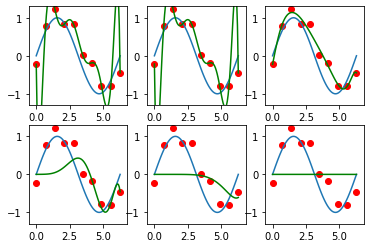

In [18]:
#図1.7を書いてみる。
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def solW(xData, yData, M, lam):
    A = np.zeros((M+1, M+1))
    T = np.zeros((M+1, 1))
    for i in range(M + 1):
        for (x, y) in zip(xData, yData):
            for j in range(M + 1):
                A[i][j] += x ** (i+j)
            T[i] += y * x**i

    A = A + np.exp(lam) * np.identity(M + 1)
    
    W = np.linalg.inv(A).dot(T)
    
    return W.T
    
def getY(x, ws):
    y = 0
    xTmp = np.ones(len(x))
    
    for w in ws[0]:
        y += w * xTmp
        xTmp *= x
    
    return y
    
numSin = 100
xSin = 2 * math.pi / (numSin - 1) * np.array(range(numSin))
ySin = np.sin(xSin)

numData = 10
xData = 2 * math.pi / (numData - 1) * np.array(range(numData))
yData = np.sin(xData) + np.random.normal(loc = 0, scale = 0.3, size = numData)

W = []
yW = []
for lam in range(-40, 41):
    W.append(solW(xData, yData, numData - 1, lam))
    yW.append(getY(xSin, solW(xData, yData, numData - 1, lam)))

graphNum = 0
for m in [0, 16, 32, 48, 64, 80]:
    graphNum += 1
    pos = 230 + graphNum
    plt.subplot(pos)
    plt.ylim(-1.3, 1.3)
    plt.plot(xSin, ySin)
    plt.plot(xSin, yW[m], color = "green")
    plt.scatter(xData, yData, color = "red")
    print(W[m])
    #lambdaが0に近づくと、ノルムが0に近づく。
    print(sum(W[m][0] ** 2))

plt.show()


ModuleNotFoundError: No module named 'sklearn'